# Example: Similarity-centric analogous bars
* This notebook shows an application of the <b>similarity-centric analogous bars method</b> to compare barcodes built on two different point clouds `P` and `Q`.

#### Similarity-centric analogous bars
* <b> Inputs </b>:
    * Distance matrix among points in `P`
    * Distance matrix among points in `Q`
    * Corss-system distance matrix among `P` and `Q`.
* <b> Goal </b>:
    Given a selected bar in the Witness barcode `barcode(W(P,Q))`, find its representations in `barcode(VR(P))` and `barcode(VR(Q))`
* <b> Implementation </b>: 
    * Given a selected bar `bar_W_PQ` in `barcode(W(P,Q))`, apply Dowker's Theorem to find the corresponding bar `bar_W_QP` in `barcode(W(Q,P))`. 
    * Apply the bar-to-bars extension method to find the representation of `bar_W_PQ` in `barcode(VR(P))`.
    * Apply the bar-to-bars extension method second time to find the representation of `bar_W_QP` in `barcode(VR(Q))`.
    * All extension methds are implemented component-wise with $\mathbb{F}_2$ coefficients. We assume that all bars of barcodes have unique death times. 

#### Example data 
* `Q`: points sampled from a torus
* `P`: "confused circle" on a torus
* The goal is to identify which of the S1's of `P` is encoded in `Q`

#### Contents 
1. Load points and visualize
2. Plot the four relevant barcodes
3. Run the similarity-centric analogous bars method
4. Explore cycle extension & bar extension under fixed interval decompositions of `barcode(VR(P))` and `barcode(VR(Q))`.
5. Explore alternative bar extensions under all possible interval decompositions of `barcode(VR(P))` and `barcode(VR(Q))`.

In [1]:
using Revise
includet("../../../extension_method.jl")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4904516990251610926\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-4367448260767726612\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4904516990251610926\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Warning: ORCA.jl has been deprecated and all savefig functionality
│ has been implemented directly in PlotlyBase itself.
│ 
│ By implementing in PlotlyBase.jl, the savefig routines are automatically
│ available to PlotlyJS.jl also.
└ @ ORCA /opt/julia/packages/ORCA/U5XaN/src/ORCA.jl:8


In [2]:
using .ext
using DelimitedFiles
using Printf
using HDF5
using Eirene
using Plots
using JLD

# 1. Load points and visualize
* `P`: a "confused circle" on a torus
* `Q`: points sampled from a torus

In [3]:
data = load("data.jld")
P = data["circle"] # 3-dimensional coordinates
P_theta = data["circle_theta"]
P_phi = data["circle_phi"]
Q = data["torus"] # 3-dimensional coordinates
Q_theta = data["torus_theta"]
Q_phi = data["torus_phi"];

# print number of points 
print("number of points in P: ", size(P,1), "\n")
print("number of points in Q: ", size(Q,1))

┌ Warning: JLD incorrectly extends FileIO functions (see FileIO documentation)
└ @ FileIO /opt/julia/packages/FileIO/JA3Vl/src/loadsave.jl:215


number of points in P: 70
number of points in Q: 300

Plot points on 3D

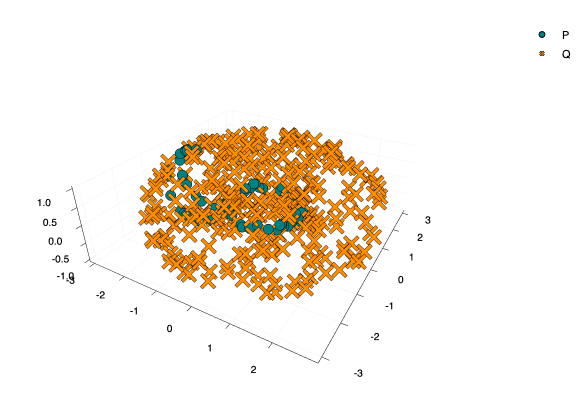

In [4]:
plot_3D(P, Q, P_markersize = 3, Q_markersize = 2)

Plot the points on a square torus. Assume that the sides of the squares have been identified to represent a torus

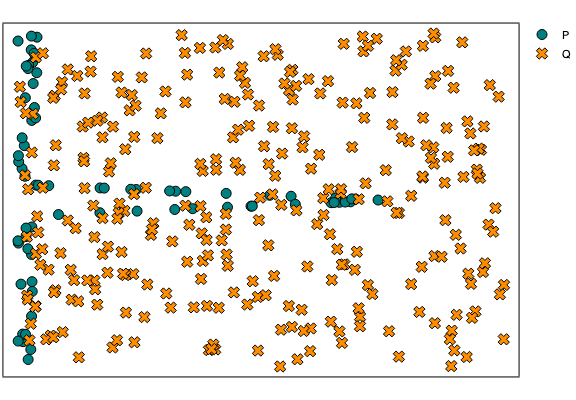

In [5]:
P_2d = hcat(P_theta, P_phi)
Q_2d = hcat(Q_theta, Q_phi)

p = plot_P_Q(P_2d, Q_2d)

# 2. Plot the four relevant barcodes

In [6]:
# compute distance
D_P, D_Q, D_P_Q, D_Q_P = compute_distance(P, Q);

In [7]:
# Compute Vietoris-Rips persistence on two regions
dim = 1
VR_P = eirene(D_P, record = "all", maxdim = dim)
VR_Q = eirene(D_Q, record = "all", maxdim = dim)

# compute Witness persistence
W_P = compute_Witness_persistence(D_P_Q, maxdim = dim)
W_Q = compute_Witness_persistence(D_Q_P, maxdim = dim);

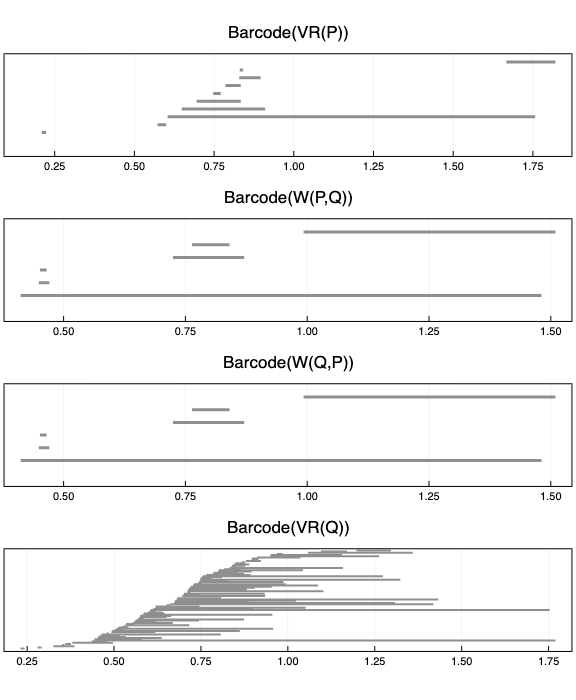

In [8]:
# plot all four barcodes
barcode_VR_P = barcode(VR_P, dim = 1)
barcode_W_P = barcode(W_P["eirene_output"], dim = 1)
barcode_W_Q = barcode(W_Q["eirene_output"], dim = 1)
barcode_VR_Q = barcode(VR_Q, dim = 1)

# plot
p1 = plot_barcode(barcode_VR_P, lw = 3, title = "Barcode(VR(P))", titlefontsize = 12)
p2 = plot_barcode(barcode_W_P, lw = 3, title = "Barcode(W(P,Q))", titlefontsize = 12)
p3 = plot_barcode(barcode_W_Q, lw = 3, title = "Barcode(W(Q,P))", titlefontsize = 12)
p4 = plot_barcode(barcode_VR_Q, lw = 2, title = "Barcode(VR(Q))", titlefontsize = 12)
plot(p1, p2, p3, p4, layout = grid(4,1), size = (500, 700))

# 3. Run similarity-centric analogous bars method

Select bar in `barcode(W(P,Q))`

In [9]:
# select bar
W_P_bar = 2

# run extension
extension_P, extension_Q = run_similarity_analogous(VR_P = VR_P,
                                                    D_P = D_P,
                                                    VR_Q = VR_Q,
                                                    D_Q = D_Q,
                                                    W_PQ = W_P,
                                                    W_PQ_bar = W_P_bar,
                                                    dim = 1);

Plot baseline bar extensions

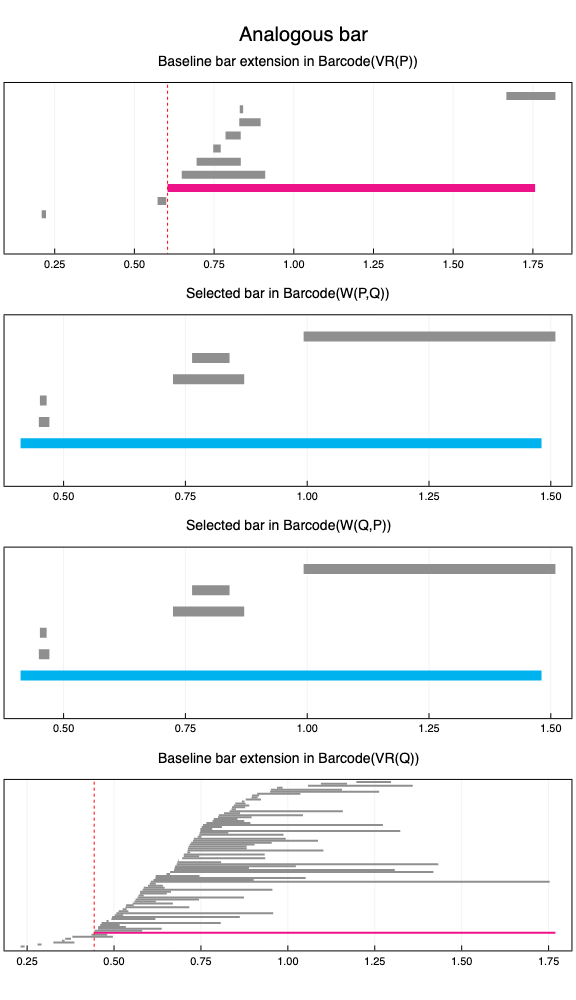

In [10]:
plot_analogous_bars(extension_P, extension_Q, lw_VR_P = 8, lw_W = 10)

Plot baseline cycle extensions

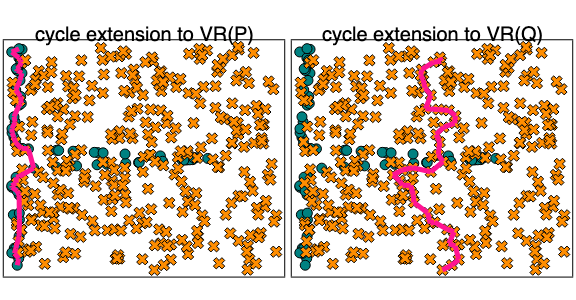

In [11]:
# select baseline cycle extension in P
epsilon0_P = extension_P["epsilon_0"]
cycle_P = extension_P["cycle_extensions"][epsilon0_P]["baseline"]

# select baseline cycle extension in Q
epsilon0_Q = extension_Q["epsilon_0"]
cycle_Q = extension_Q["cycle_extensions"][epsilon0_Q]["baseline"]

p1 = plot_cycle_square_torus(P_2d, Q_2d, cycle = cycle_P, cycle_loc = "P", title = "cycle extension to VR(P)"; legend = false)
p2 = plot_cycle_square_torus(P_2d, Q_2d, cycle = cycle_Q, cycle_loc = "Q", title = "cycle extension to VR(Q)"; legend = false)

plot(p1, p2, layout = grid(1,2), size = (600, 300))

# 4. Explore cycle extension & bar extension under fixed interval decompositions of `barcode(VR(P))` and `barcode(VR(Q))`.
* The `run_similarity_analogous()` function presents the component-wise cycle and bar extensions to `barcode(VR(P))` and `barcode(VR(Q))`. This section illustrates the use of various functions to explore all cycle extension & bar extensions.
* For bar extensions, we only consider the result under a fixed interval decomposition of `barcode(VR(P))` and `barcode(VR(Q))`.
* This section is organized as the following.  
    * (a) Plotting the extension parameters for both `barcode(VR(P))` and `barcode(VR(Q))` 
    * (b) Interactively exploring the baseline and offset bar-extensions at various parameters.  
    * (c) Finding all cycle extensions and bar extensions (non-interactive). 
* Both subsection (b) and (c) illustrate how one may understand the bar-extensions. If your auxiliary filtration and target filtraiton barcodes have large number of bars, then implementing the non-interactive method may take a while.

## 4(a) Examine the parameters `p_Y`

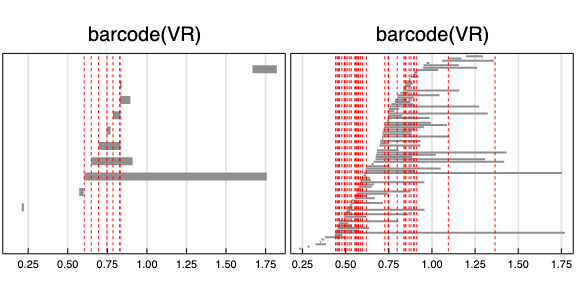

In [12]:
p1 = plot_pY(extension_P, lw = 8)
p2 = plot_pY(extension_Q)

plot(p1, p2, grid = (1, 2), size = (700, 300))

## 4(b) Interactive exploration of baseline and offset bar extensions
* We use the function `return_extension_results_at_parameter()`, which is an interactive function that requires the user to select the following:
    * A parameter of `p_Y` 
    * Offset bar extensions
* The function shows the baseline bar-extension at selected parameter, along with the final bar-extension (baseline bar extension + selected offset bar extensions).
* The function returns a plot object that highlights the final bar extension

<b> Explore extension results to `barcode(VR(P))`</b>

In [13]:
p = return_extension_results_at_parameter(extension_P);

*** Parameter key, value pair *** 
key: 1 parameter: 0.604115 
key: 2 parameter: 0.648477 
key: 3 parameter: 0.695102 
key: 4 parameter: 0.747293 
key: 5 parameter: 0.785789 
key: 6 parameter: 0.828958 
key: 7 parameter: 0.830454 



Select a key for parameter 1


Selected parameter: 0.6041150495756741

Baseline bars extension at selected parameter: [11]

*** Offset bar extensions at selected parameter *** 



Select keys for offset bar extensions. 
Leave blank to select none. 
To select multiple keys, separate keys with space. ex) 1 2 3 :  



Baseline bars extension at selected parameter: [11]


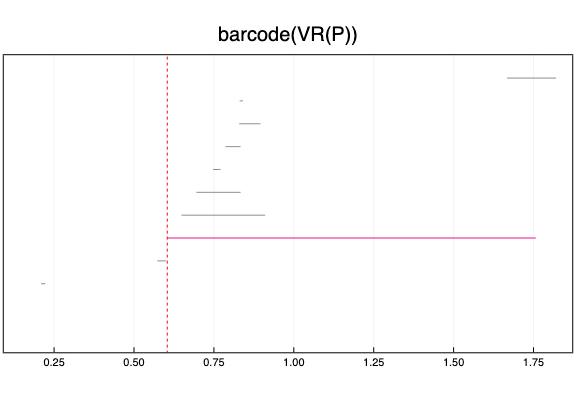

In [14]:
plot(p, title = "barcode(VR(P))")

<b>Explore extension results to `barcode(VR(Q))` </b>

In [50]:
p = return_extension_results_at_parameter(extension_Q);

*** Parameter key, value pair *** 
key: 1 parameter: 0.442877 
key: 2 parameter: 0.444015 
key: 3 parameter: 0.454249 
key: 4 parameter: 0.460147 
key: 5 parameter: 0.464035 
key: 6 parameter: 0.478347 
key: 7 parameter: 0.492438 
key: 8 parameter: 0.494427 
key: 9 parameter: 0.502065 
key: 10 parameter: 0.513026 
key: 11 parameter: 0.524723 
key: 12 parameter: 0.532820 
key: 13 parameter: 0.553613 
key: 14 parameter: 0.558562 
key: 15 parameter: 0.562050 
key: 16 parameter: 0.570657 
key: 17 parameter: 0.574416 
key: 18 parameter: 0.585488 
key: 19 parameter: 0.597537 
key: 20 parameter: 0.619915 
key: 21 parameter: 0.727001 
key: 22 parameter: 0.746463 
key: 23 parameter: 0.748513 
key: 24 parameter: 0.798899 
key: 25 parameter: 0.837899 
key: 26 parameter: 0.844131 
key: 27 parameter: 0.848869 
key: 28 parameter: 0.867890 
key: 29 parameter: 0.878824 
key: 30 parameter: 0.895384 
key: 31 parameter: 0.896926 
key: 32 parameter: 0.911642 
key: 33 parameter: 1.095031 
key: 34 parameter


Select a key for parameter 20


Selected parameter: 0.6199148393356129

Baseline bars extension at selected parameter: [83]

*** Offset bar extensions at selected parameter *** 
key: 1 offset bar extension: [36]
key: 2 offset bar extension: [29]
key: 3 offset bar extension: [6]
key: 4 offset bar extension: [34]
key: 5 offset bar extension: [27]
key: 6 offset bar extension: [28]
key: 7 offset bar extension: [22]
key: 8 offset bar extension: [25]
key: 9 offset bar extension: [68]
key: 10 offset bar extension: [32]



Select keys for offset bar extensions. 
Leave blank to select none. 
To select multiple keys, separate keys with space. ex) 1 2 3 :  



Baseline bars extension at selected parameter: [83]


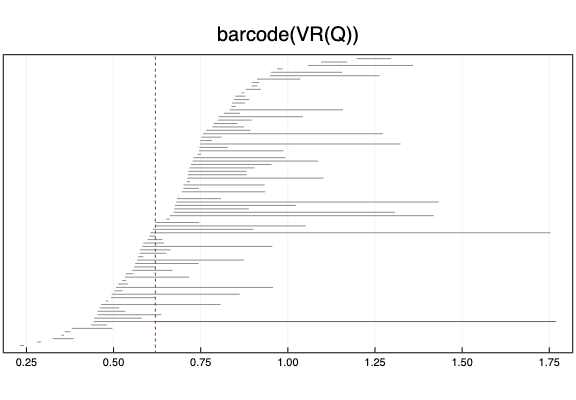

In [51]:
plot(p, title ="barcode(VR(Q))")

## 4(c) All cycle extensions and bar extensions 
* We use the function `find_CE_BE_at_param()` to find all cycle extensions and bar extensions at a specific parameter.
* Let `CE_param`, `BE_param` be the outputs of the function.  
    * `CE_param[i]` is the i-th cycle extension at given parameter.  
    * `BE_param[i]` is the bar extension of the corresponding cycle extension. 
* Note that one could use the function `find_CE_BE()` to find the cycle extensions and bar extensions at all parameters. For this particular example, the function takes a long time to complete.

### 4(c) i. Extensions to `barcode(VR(P))`

In [43]:
# select parameter
param = extension_P["nontrivial_pY"][2]
CE_param, BE_param = find_CE_BE_at_param(extension_P, param);

<b> plot cycle extensions to `barcode(VR(P))`

In [44]:
@printf("number of cycle extensions at parameter %.4f : %i", param, length(CE_param))

number of cycle extensions at parameter 0.6485 : 2

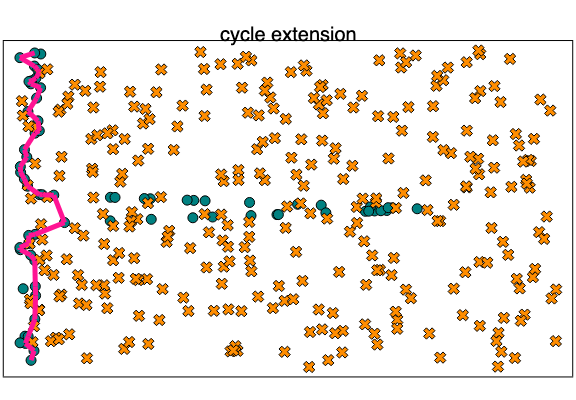

In [45]:
# plot the cycle extension at selected parameter
idx = 0
p = plot_cycle_square_torus(P_2d, Q_2d, cycle = CE_param[idx], cycle_loc = "P", title = "cycle extension",
                                P_markersize = 5, Q_markersize = 5; legend = false)

Plot the <b>bar extensions</b> at given parameter.
* Select a cycle extension 
* Find and plot the corresponding bar extensions

In [46]:
# select parameter 
@printf("number of cycle extensions at parameter %.4f : %i", param, length(CE_param))

number of cycle extensions at parameter 0.6485 : 2

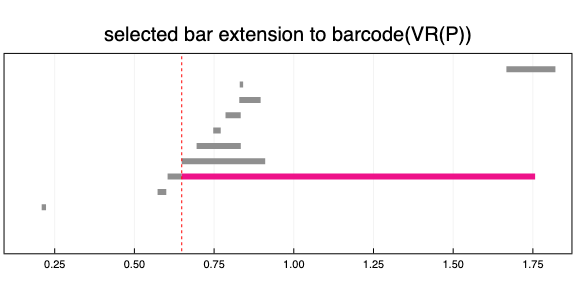

In [49]:
# select cycle extension 
y= 0

# find the corresponding bar extension
be = BE_param[y]

# plot the bar extension
barcode_VR_P = barcode(VR_P, dim = dim)
p = plot_barcode(barcode_VR_P, title = "selected bar extension to barcode(VR(P))", lw = 6, selected_bars = be, epsilon= param, v_line = [param])
plot(p, size = (500, 300))

### 4(c) ii. Extensions to `barcode(VR(Q))`

In [50]:
# select parameter
param = extension_Q["nontrivial_pY"][1]
CE_param, BE_param = find_CE_BE_at_param(extension_Q, param);

<b> plot cycle extensions to `barcode(VR(Q))`</b>

In [51]:
@printf("number of cycle extensions at parameter %.4f : %i", param, length(CE_param))

number of cycle extensions at parameter 0.4429 : 2

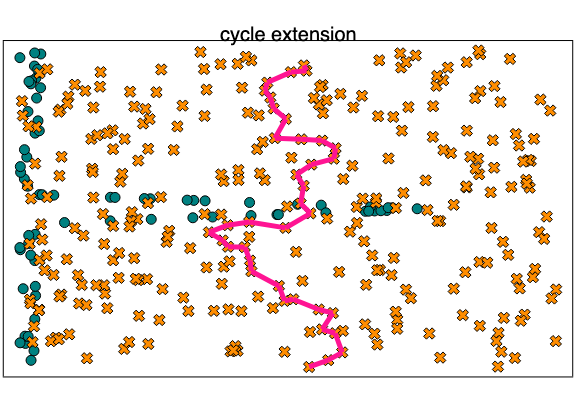

In [59]:
# plot a cycle extension at selected parameter
idx = 0
p = plot_cycle_square_torus(P_2d, Q_2d, cycle = CE_param[idx], cycle_loc = "Q", title = "cycle extension",
                                P_markersize = 5, Q_markersize = 5; legend = false)

Plot the <b>bar extensions</b> at given parameter.
* Select a cycle extension 
* Find and plot the corresponding bar extensions

In [60]:
# select parameter 
@printf("number of cycle extensions at parameter %.4f : %i", param, length(CE_param))

number of cycle extensions at parameter 0.4429 : 2

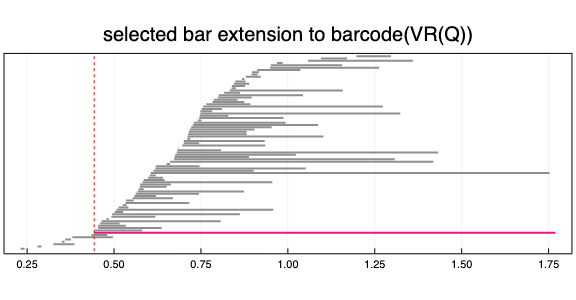

In [61]:
# select cycle extension 
y= 0
# find the corresponding bar extension
be = BE_param[y]

# plot the bar extension
barcode_VR_Q = barcode(VR_Q, dim = dim)
p = plot_barcode(barcode_VR_Q, title = "selected bar extension to barcode(VR(Q))", lw = 2, selected_bars = be, epsilon= param, v_line = [param])
plot(p, size = (500, 300))

# 5. Explore the bar extension result under alternative interval decompositions of `C_VR`
* Up to this point, the bar extension result has been obtained for some fixed interval decompositions of `barcode(VR(P))` and `barcode(VR(Q))`. In particular, we used the default interval decomposition that is used by Eirene.
* In this section, we present various functions that allow us to find the full bar extensions under all possible interval decompositions. The goal of this section is to explore $S(\tau, X_P^{\bullet})$  and $S(\tau', X^\bullet_Q)$ from Algorithm 7 of paper. We'll refer to this set as <b>alternative bar extensions</b> since these arise from alternative choices of the interval decompositions.
* We present three different methods for exploring the collection of alternative bar extensions. The appropriate tool depends on the sizes of the barcodes of the auxiliary filtration and the target filtration.
* From the bar-to-bars extension method from $W^{\bullet}_{P,Q}$ to $X^\bullet_P$. 
    * Let $p_Y^P$ denote the collection of parameters.
    * let $\mathfrak{E}_{\ell}^P$ denote the collection of cycle extensions at parameter $\ell$
    * Let $L_Y^P$ denote the collection of matrices (Algorithm 2 step (5)(b)(ii). 
* From the bar-to-bars extension method from $W^\bullet_{Q,P}$ to $X^\bullet_Q$, let $p_Y^Q$, $\mathfrak{E}_{\ell}^Q$ and $L_Y^Q$ denote the analogous collections. 

1. Find all alternative bar extensions for all parameters.  
    * This is recommended for data with small barcodes. 
    * This finds the full $S(\tau, X^\bullet_P) = \{ S^{\mathcal{D} \circ L^{-1}}_{[y]} | \ell \in p^P_Y, [y] \in \mathfrak{E}^P_{\ell}, L \in L^P_Y \}$ and $S(\tau', X^\bullet_Q) = \{ S^{\mathcal{D} \circ L^{-1}}_{[y]} | \ell \in p^Q_Y, [y] \in \mathfrak{E}^Q_{\ell}, L \in L^Q_Y \}$ from Algorithm 7. 
2. Find alternative bar extensions at specific parameters.  
    * This is recommended for data with medium size barcodes.
    * Given a parameter $\ell$, this method finds $S(\tau, X^\bullet_P; \ell) = \{ S^{\mathcal{D} \circ L^{-1}}_{[y]} | [y] \in \mathfrak{E}^P_{\ell}, L \in L^P_Y \}$ and $S(\tau', X^\bullet_Q; \ell) = \{ S^{\mathcal{D} \circ L^{-1}}_{[y]} | [y] \in \mathfrak{E}^Q_{\ell}, L \in L^Q_Y \}$.
3. Find alternative bar extensions of a specific bar extension.
    * This is recommended for data with large size barcodes.
    * Given a selected parameter $\ell$ and cycle extension $[y] \in \mathfrak{E}^P_{\ell}$, this method finds $\{S^{\mathcal{D} \circ L^{-1}}_{[y]} | L \in L^P_Y \}$. Similarly, given a selected parameter $\ell$ and cycle extension $[y] \in \mathfrak{E}^Q_{\ell}$, this method finds $\{S^{\mathcal{D} \circ L^{-1}}_{[y]} | L \in L^Q_Y \}$.  
For this example, we'll implement method 3 due to the large number of bars `barcode(C_VR)`. For example implementations of methods 1 and 2, see notebook `EXAMPLE_EXTENSION_VR_VR.ipynb`


## 5 i. Find alternative bar extensions of a specific bar extension to `barcode(VR(P))`

In [84]:
# select a parameter and bar extension of interest
param = extension_P["nontrivial_pY"][1]

0.6041150495756741

Select a bar of interest

In [85]:
# find all bar extensions (under fixed interval decomposition of C_Y) at given parameter
CE_param, BE_param = find_CE_BE_at_param(extension_P, param);
@printf("number of bar extensions at parameter %.4f : %i", param, length(BE_param))

number of bar extensions at parameter 0.6041 : 1

In [86]:
# select bar extension of interest
bar_ext = BE_param[0]

1-element Array{Int64,1}:
 11

In [87]:
# find alternative representations of the selected bar extension (under different interval decompositions of C_Y)
alt_bar_ext = find_alternative_bar_extension(extension_P, param, bar_extension = bar_ext)

1-element Array{Array{Int64,1},1}:
 [11]

In [89]:
# plot one of the alternative bar extensions

# select an alternative bar extension
alt = alt_bar_ext[1]
barcode_Y = barcode(extension_P["C_VR"], dim = dim)
p =plot_barcode(barcode_Y, selected_bars = alt, lw = 8,
                    epsilon = param, v_line = [param],
                    title = "alternative bar extension in barcode(VR(P))")
plot(p)

<!DOCTYPE html>
 
 
 Plots.jl

In this case, there are no alternative intervals

## 5 ii. Find alternative bar extensions of a specific bar extension to `barcode(VR(Q))`

In [56]:
# select a parameter and bar extension of interest
param = extension_Q["nontrivial_pY"][1]

0.44287738987124853

Select a bar of interest

In [57]:
# find all bar extensions (under fixed interval decomposition of C_Y) at given parameter
CE_param, BE_param = find_CE_BE_at_param(extension_Q, param);
@printf("number of bar extensions at parameter %.4f : %i", param, length(BE_param))

number of bar extensions at parameter 0.4429 : 2

In [58]:
# select bar extension of interest
bar_ext = BE_param[1]

2-element Array{Int64,1}:
 16
 83

In [59]:
# find alternative representations of the selected bar extension (under different interval decompositions of C_Y)
alt_bar_ext = find_alternative_bar_extension(extension_Q, param, bar_extension = bar_ext)

4-element Array{Array{Int64,1},1}:
 [16, 83]
 [83]
 [16, 17, 83]
 [17, 83]

In [114]:
# plot one of the alternative bar extensions

# select an alternative bar extension
alt = alt_bar_ext[3]
barcode_Y = barcode(extension_Q["C_VR"], dim = dim)
p =plot_barcode(barcode_Y, selected_bars = alt, lw = 3,
                    epsilon = param, v_line = [param],
                    title = "alternative intervals")
plot(p)

<!DOCTYPE html>
 
 
 Plots.jl